In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import collections

In [1]:
header = ['Sentiment', 'Emotion']
train = pd.read_csv('./cn-data-revised/train_split.csv')[header]
train = train.reset_index().rename(columns={'index': 'id'})

test = pd.read_csv('./cn-data-revised/test_split.csv')[header]
test = test.reset_index().rename(columns={'index': 'id'})

dev = pd.read_csv('./cn-data-revised/valid_split.csv')[header]
dev = dev.reset_index().rename(columns={'index': 'id'})

NameError: name 'pd' is not defined

In [336]:
# train[train['Emotion'] == 'positive-other']['Utterance'].to_csv("positive-other.csv")
# train[train['Emotion'] == 'negative-other']['Utterance'].to_csv("negative-other.csv")


In [363]:
emotions_dict = {}
emotions_dict_verse = {}
sentiment_mapping = {}
ekman_mapping = {}

with open('./data/emotions.txt', 'r') as file:
    for line_number, line in enumerate(file, start=0):
        emotion = line.strip()
        emotions_dict[str(line_number)] = emotion
        emotions_dict_verse[emotion] = str(line_number)
with open('./data/sentiment_mapping.json', 'r') as file:
    sentiment_mapping = json.load(file)

with open('./data/ekman_mapping.json', 'r') as file:
    ekman_mapping = json.load(file)

In [364]:
train_emotion_set = set(train.Emotion.unique())
emotion_set = set(emotions_dict_verse.keys())

In [365]:
emotion_set - train_emotion_set

set()

In [380]:
matching_updated = {
    'sadness': ['sadness'],
    'happy': ["joy"],
    'grateful': ["gratitude"],
    'relaxed': ["relief"],
    'admiration':["admiration"],
    'optimism': ['optimism'],
    'love': ['love'],
    'neutral': ["neutral"],
    'anger': ["anger", "annoyance"],
    'fear': ["fear"],
    'depress': ["grief"],
    'disgust': ["disgust"],
    'astonished': ["surprise"],
    'worried': ["nervousness", "disapproval"],
    'confusion': ['confusion'],
    'embarrassment':['embarrassment'],
    'remorse':['remorse'],
    'disapproval':['disapproval'],
    'amusement': ['amusement'],
    'approval':['approval'],
    'caring':['caring'],
    'curiosity':['curiosity'],
    'desire':['desire'],
    'disappointment':['disappointment'],
    'excitement':['excitement'],
    'pride':['pride'],
    'realization':['realization'],
    'nervousness':['nervousness'],
    'annoyance':['annoyance'],
    'gratitude':['gratitude'],
    'grief':['grief'],
    'joy': ['joy'],
    'relief':['relief'],
    'surprise':['surprise']
}

In [381]:
def f(key):
    if key == 'other':
        return '-1'
    return emotions_dict_verse[key]

def apply_function(row):
    ids = list(map(f, row['emotion']))  # Assuming 'emotion' is a comma-separated string
    return ','.join(ids)


In [382]:
train['emotion'] = train['Emotion'].map(matching_updated)
dev['emotion'] = dev['Emotion'].map(matching_updated)
test['emotion'] = test['Emotion'].map(matching_updated)

train['emotion_id'] = '-1'
dev['emotion_id'] = '-1'
test['emotion_id'] = '-1'

In [383]:
train.Emotion.values[66]

'nervousness'

In [385]:
train['emotion_id'] = train.apply(apply_function, axis=1)

In [386]:
test['emotion_id'] = test.apply(apply_function, axis=1)
train['emotion_id'] = train.apply(apply_function, axis=1)
dev['emotion_id'] = dev.apply(apply_function, axis=1)

In [387]:
train = train[train['emotion_id'] != '-1']
dev = dev[dev['emotion_id'] != '-1']
test = test[test['emotion_id'] != '-1']

In [388]:
train.shape

(94187, 5)

In [389]:
train_emotion_stats_dict = collections.defaultdict(int)
dev_emotion_stats_dict = collections.defaultdict(int)
test_emotion_stats_dict = collections.defaultdict(int)

for i in train.emotion_id:
    emotion_ids = i.split(',')
    for id in emotion_ids:
        train_emotion_stats_dict[emotions_dict[id]] += 1

for i in dev.emotion_id:
    emotion_ids = i.split(',')
    for id in emotion_ids:
        dev_emotion_stats_dict[emotions_dict[id]] += 1
        
for i in test.emotion_id:
    emotion_ids = i.split(',')
    for id in emotion_ids:
        test_emotion_stats_dict[emotions_dict[id]] += 1

In [390]:
train_emotion_stats_df = pd.DataFrame(list(train_emotion_stats_dict.items()), columns=['Emotion', 'Count'])
train_emotion_stats_df['Type'] = 'train'
train_emotion_stats_df = train_emotion_stats_df.sort_values(by='Count', ascending=False)
dev_emotion_stats_df = pd.DataFrame(list(dev_emotion_stats_dict.items()), columns=['Emotion', 'Count'])
dev_emotion_stats_df['Type'] = 'dev'
dev_emotion_stats_df = dev_emotion_stats_df.sort_values(by='Count', ascending=False)
test_emotion_stats_df = pd.DataFrame(list(test_emotion_stats_dict.items()), columns=['Emotion', 'Count'])
test_emotion_stats_df['Type'] = 'test'
test_emotion_stats_df = test_emotion_stats_df.sort_values(by='Count', ascending=False)

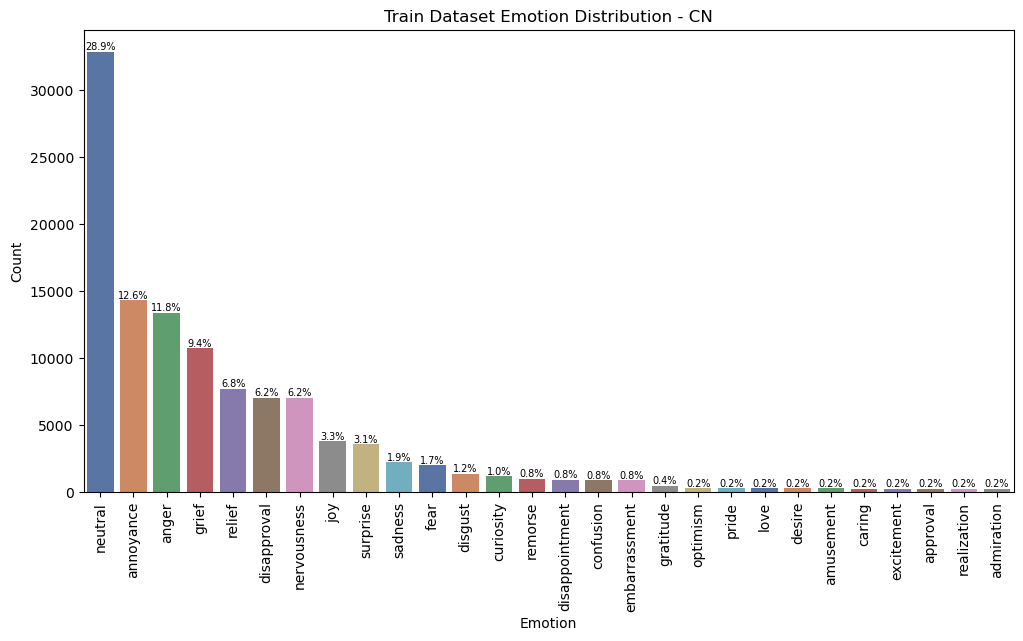

In [391]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Emotion', y='Count', data=train_emotion_stats_df, palette='deep')

total = train_emotion_stats_df['Count'].sum()
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinate for the label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    # Place the label on the bar
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=7)
    
plt.title('Train Dataset Emotion Distribution - CN')
plt.xticks(rotation=90)

plt.show()

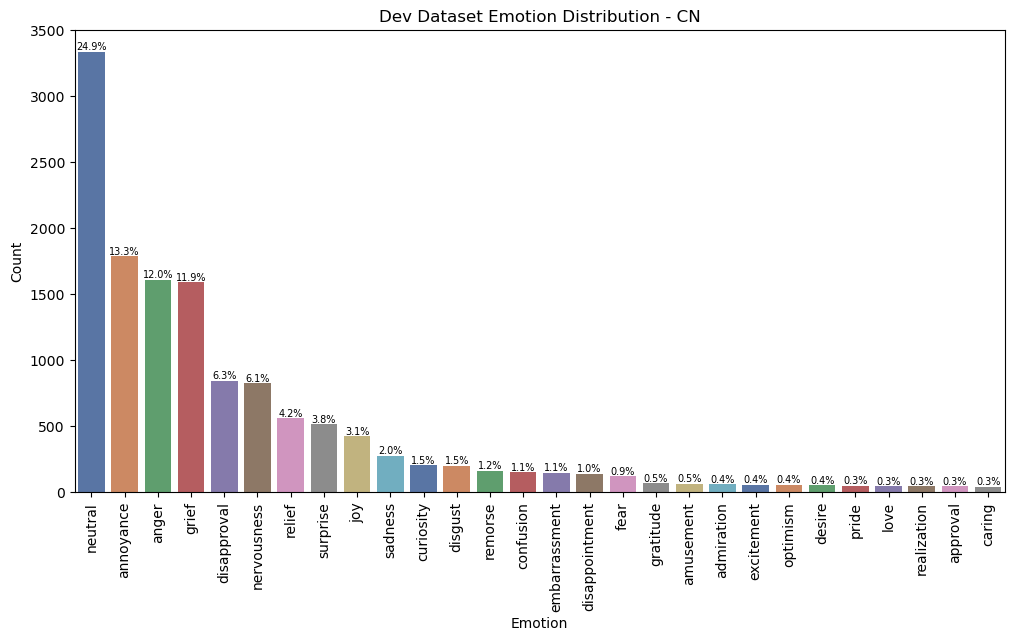

In [392]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Emotion', y='Count', data=dev_emotion_stats_df, palette='deep')

total = dev_emotion_stats_df['Count'].sum()
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinate for the label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    # Place the label on the bar
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=7)
    
plt.title('Dev Dataset Emotion Distribution - CN')
plt.xticks(rotation=90)

plt.show()

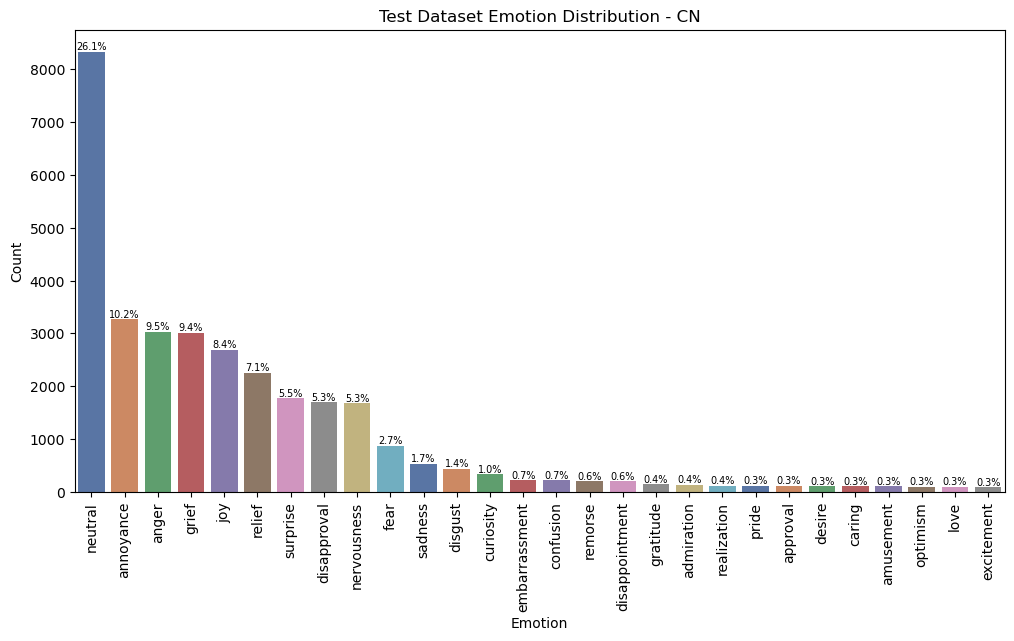

In [393]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Emotion', y='Count', data=test_emotion_stats_df, palette='deep')

total = test_emotion_stats_df['Count'].sum()
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinate for the label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    # Place the label on the bar
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=7)
    
plt.title('Test Dataset Emotion Distribution - CN')
plt.xticks(rotation=90)

plt.show()

/var/folders/nc/35jp7xd579540ylpwlppwwfh0000gn/T/ipykernel_10559/2718985091.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_df = one_hot_df.replace(emotions_dict).str.get_dummies().sum(level=0)


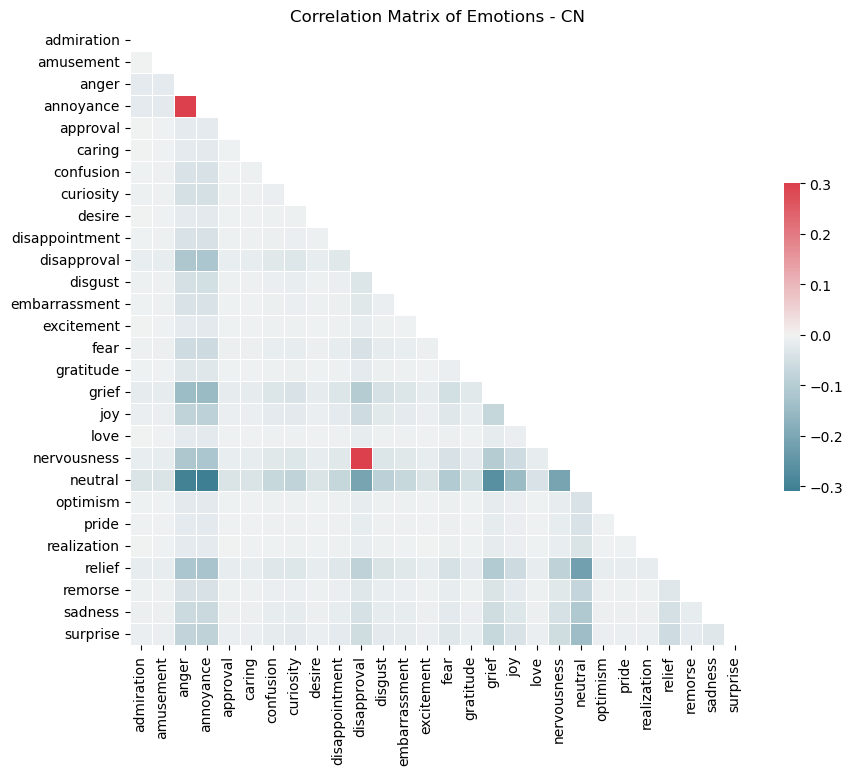

In [396]:
one_hot_df = train['emotion_id'].str.split(',').explode()
one_hot_df = one_hot_df.replace(emotions_dict).str.get_dummies().sum(level=0)

correlation_matrix = one_hot_df.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
  
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, mask=mask,
      center=0,
      square=True,
      linewidths=.5,cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Emotions - CN')
plt.show()

In [397]:
train_sentiment_stats_dict = collections.defaultdict(int)
dev_sentiment_stats_dict = collections.defaultdict(int)
test_sentiment_stats_dict = collections.defaultdict(int)

for key in sentiment_mapping.keys():
    for item in sentiment_mapping[key]:
        train_sentiment_stats_dict[key] += train_emotion_stats_dict[item]
        dev_sentiment_stats_dict[key] += dev_emotion_stats_dict[item]
        test_sentiment_stats_dict[key] += test_emotion_stats_dict[item]
    
    

In [398]:
train_ekman_stats_dict = collections.defaultdict(int)
dev_ekman_stats_dict = collections.defaultdict(int)
test_ekman_stats_dict = collections.defaultdict(int)

for key in ekman_mapping.keys():
    for item in ekman_mapping[key]:
        train_ekman_stats_dict[key] += train_emotion_stats_dict[item]
        dev_ekman_stats_dict[key] += dev_emotion_stats_dict[item]
        test_ekman_stats_dict[key] += test_emotion_stats_dict[item]
    

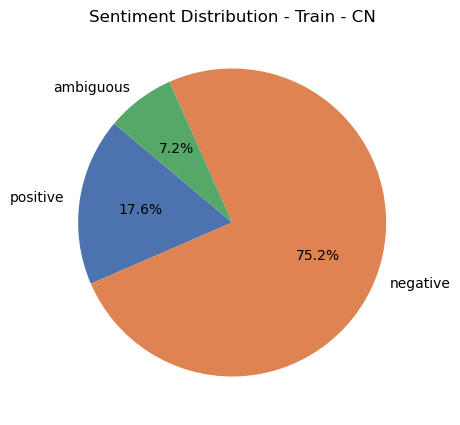

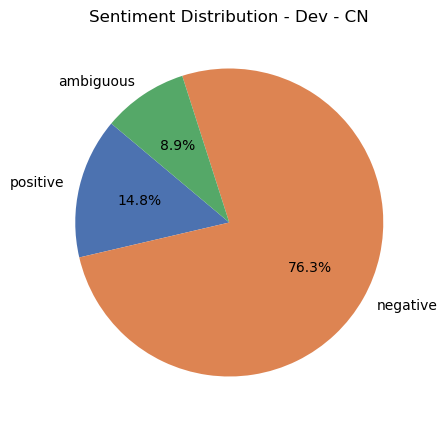

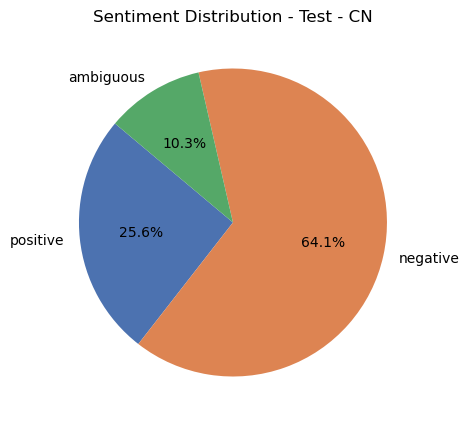

In [403]:
plt.figure(figsize=(5, 5))
plt.pie(train_sentiment_stats_dict.values(), labels=train_sentiment_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Sentiment Distribution - Train - CN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(dev_sentiment_stats_dict.values(), labels=dev_sentiment_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Sentiment Distribution - Dev - CN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(test_sentiment_stats_dict.values(), labels=test_sentiment_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Sentiment Distribution - Test - CN')
plt.show()

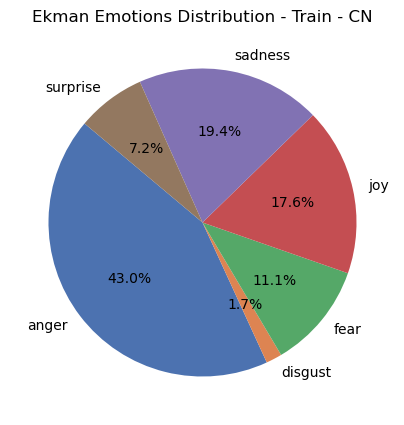

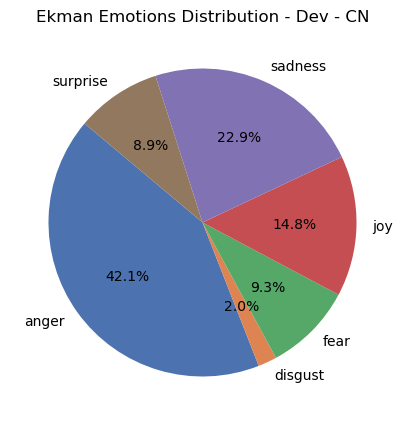

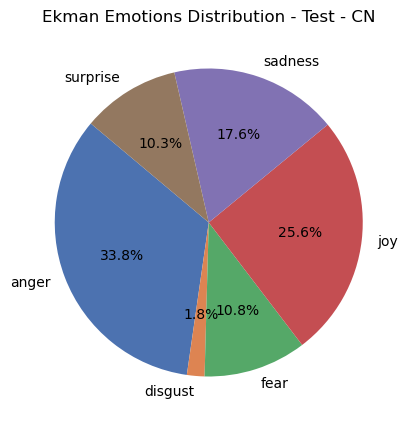

In [402]:
plt.figure(figsize=(5, 5))
plt.pie(train_ekman_stats_dict.values(), labels=train_ekman_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Ekman Emotions Distribution - Train - CN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(dev_ekman_stats_dict.values(), labels=dev_ekman_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Ekman Emotions Distribution - Dev - CN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(test_ekman_stats_dict.values(), labels=test_ekman_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Ekman Emotions Distribution - Test - CN')
plt.show()